<a href="https://colab.research.google.com/github/jrangelg/Artificial-intelligence/blob/main/Bagging_vs_Random_Forest_vs_XGBoosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bagging  vs  Random  Forest vs XGBoosting

# Importar librerias

In [ ]:
#importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importar archivos csv

In [ ]:
#leer los archivos
#Leer el archivo de entrenamiento:
train = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Traffic-Forecasting/main/train_aWnotuB.csv')
#Leer el archivo de prueba:
test = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Traffic-Forecasting/main/test_BdBKkAj.csv')
#Leer el archivo de envío de muestras
sample = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Traffic-Forecasting/main/sample_submission_EZmX9uE.csv')

In [ ]:
train # Datos de entrenamiento

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194
48116,2017-06-30 20:00:00,4,30,20170630204
48117,2017-06-30 21:00:00,4,16,20170630214
48118,2017-06-30 22:00:00,4,22,20170630224


In [ ]:
test # Datos de Prueba

,DateTime,Junction,ID
0,2017-07-01 00:00:00,1,20170701001
1,2017-07-01 01:00:00,1,20170701011
2,2017-07-01 02:00:00,1,20170701021
3,2017-07-01 03:00:00,1,20170701031
4,2017-07-01 04:00:00,1,20170701041
...,...,...,...
11803,2017-10-31 19:00:00,4,20171031194
11804,2017-10-31 20:00:00,4,20171031204
11805,2017-10-31 21:00:00,4,20171031214
11806,2017-10-31 22:00:00,4,20171031224


In [ ]:
sample #muestra

,ID,Vehicles


In [ ]:
train.info() # información sobre los datos de entrenamiento

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [ ]:
test.info() # información sobre los datos de prueba

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11808 entries, 0 to 11807
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  11808 non-null  object
 1   Junction  11808 non-null  int64 
 2   ID        11808 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 276.9+ KB


# Revisar si existen valores nulos

In [ ]:
train.isnull().sum()

NameError: ignored

In [ ]:
test.isnull().sum()

DateTime    0
Junction    0
ID          0
dtype: int64

# Convertir columna Datetime en año, mes, semana, dia y hora (dada la estacionalidad)

In [ ]:
train['DateTime'] = pd.to_datetime(train['DateTime'], errors='coerce')
test['DateTime'] = pd.to_datetime(test['DateTime'], errors='coerce')

train['hourofday'] = train['DateTime'].dt.hour
test['hourofday'] = test['DateTime'].dt.hour

train['dayofweek'] = train['DateTime'].dt.dayofweek
test['dayofweek'] = test['DateTime'].dt.dayofweek

train['weekofyear'] = train['DateTime'].dt.week
test['weekofyear'] = test['DateTime'].dt.week

train['monthofyear'] = train['DateTime'].dt.month
test['monthofyear'] = test['DateTime'].dt.month

train['year'] = train['DateTime'].dt.year
test['year'] = test['DateTime'].dt.year


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  # This is added back by InteractiveShellApp.init_path()


# Preparar datos

In [ ]:
ID_train = train.ID
ID_test = test.ID

In [ ]:
train.drop(['ID'], axis=1, inplace=True)
test.drop(['ID'], axis=1, inplace=True)
test

,DateTime,Junction,hourofday,dayofweek,weekofyear,monthofyear,year
0,2017-07-01 00:00:00,1,0,5,26,7,2017
1,2017-07-01 01:00:00,1,1,5,26,7,2017
2,2017-07-01 02:00:00,1,2,5,26,7,2017
3,2017-07-01 03:00:00,1,3,5,26,7,2017
4,2017-07-01 04:00:00,1,4,5,26,7,2017
...,...,...,...,...,...,...,...
11803,2017-10-31 19:00:00,4,19,1,44,10,2017
11804,2017-10-31 20:00:00,4,20,1,44,10,2017
11805,2017-10-31 21:00:00,4,21,1,44,10,2017
11806,2017-10-31 22:00:00,4,22,1,44,10,2017


In [ ]:
train

,DateTime,Junction,Vehicles,hourofday,dayofweek,weekofyear,monthofyear,year
0,2015-11-01 00:00:00,1,15,0,6,44,11,2015
1,2015-11-01 01:00:00,1,13,1,6,44,11,2015
2,2015-11-01 02:00:00,1,10,2,6,44,11,2015
3,2015-11-01 03:00:00,1,7,3,6,44,11,2015
4,2015-11-01 04:00:00,1,9,4,6,44,11,2015
...,...,...,...,...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,19,4,26,6,2017
48116,2017-06-30 20:00:00,4,30,20,4,26,6,2017
48117,2017-06-30 21:00:00,4,16,21,4,26,6,2017
48118,2017-06-30 22:00:00,4,22,22,4,26,6,2017


# Convertir columnas a enteros

In [ ]:
train.hourofday=train.hourofday.astype(int)
train.dayofweek=train.dayofweek.astype(int)
train.weekofyear=train.weekofyear.astype(int)
train.monthofyear=train.monthofyear.astype(int)
train.year=train.year.astype(int)

test.hourofday=test.hourofday.astype(int)
test.dayofweek=test.dayofweek.astype(int)
test.weekofyear=test.weekofyear.astype(int)
test.monthofyear=test.monthofyear.astype(int)
test.year=test.year.astype(int)


# Graficar los datos

Text(0, 0.5, 'Vehicles')

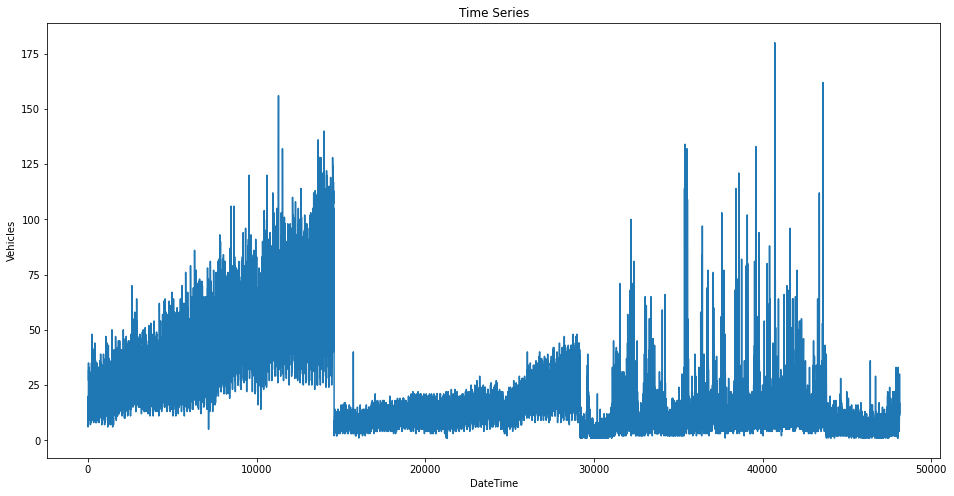

In [ ]:
import matplotlib.pyplot as plt
#suma de horas en 4 meses
train['Vehicles'].plot(figsize=(16, 8))
plt.title('Time Series')
plt.xlabel("DateTime")
plt.ylabel("Vehicles")

# Definir variables X y Y

In [ ]:
y = train['Vehicles'].values # numero de vehiculos en el cruce
X = train.drop(['Vehicles', 'DateTime'], axis=1) # Fecha
X_test = test.drop(['DateTime'], axis=1)# Fecha para predecir y validar modelo

# Dividir el conjunto de entrenamiento para la prueba y la validación

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, shuffle=False)
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)
print(X_test.shape)


(43308, 6)
(4812, 6)
(43308,)
(4812,)
(11808, 6)


# RMSE para Random forest, bagging y XGBoosting

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Instaurar rf
rf = RandomForestRegressor(n_estimators=100, random_state=2)

# Ajuste del  rf al conjunto de entrenamiento
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=2)

In [ ]:
from sklearn.metrics import mean_squared_error as MSE

# Predict the test set labels
y_pred = rf.predict(X_val)

# Evaluate the test set RMSE
rmse_test = MSE(y_val, y_pred) ** 0.5

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 13.32


## Bagging

In [ ]:
 from sklearn.ensemble import BaggingRegressor

# Instaurar br
br = BaggingRegressor(n_estimators=100, random_state=2)

# Ajuste del  br para el conjunto de entrenamiento
br.fit(X_train, y_train)

BaggingRegressor(n_estimators=100, random_state=2)

In [ ]:
from sklearn.metrics import mean_squared_error as MSE

# Predict the test set labels
y_pred1 = br.predict(X_val)

# Evaluate the test set RMSE
rmse_test1 = MSE(y_val, y_pred1) ** 0.5

# Print rmse_test
print('Test set RMSE of br: {:.2f}'.format(rmse_test1))

Test set RMSE of br: 13.32


##XGBoosting

In [ ]:
import xgboost as xgb

# Instaurar xgbr
xgbr = xgb.XGBRegressor(n_estimators=100, random_state=2)

# Ajuste del  rf al conjunto de entrenamiento
xgbr.fit(X_train, y_train)

[22:40:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(random_state=2)

In [ ]:
from sklearn.metrics import mean_squared_error as MSE

# Predict the test set labels
y_pred2 = xgbr.predict(X_val)

# Evaluate the test set RMSE
rmse_test2 = MSE(y_val, y_pred2) ** 0.5

# Print rmse_test
print('Test set RMSE of xgbr: {:.2f}'.format(rmse_test2))

Test set RMSE of xgbr: 12.46


# Hacer un  pipeline para crear modelo


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor

model = make_pipeline(StandardScaler(), BaggingRegressor(base_estimator=GradientBoostingRegressor(max_depth=10, min_samples_split=2, loss='ls',n_estimators=400, learning_rate=.1, random_state=1))).fit(X_train, y_train)
print(model.score(X_train, y_train))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in v

0.9922442284297157


# Predicción en el conjunto de validación

In [ ]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_val)
y_pred = y_pred.astype(int)
print(model.score(X_val, y_val))# precision del conjunto
print(r2_score(y_pred, model.predict(X_val)))# coeficiente de determinacion R^2

-3.39741454833149
0.9966937780792786


In [ ]:
y_val

array([17, 13,  9, ..., 16, 22, 12])

In [ ]:
y_pred

array([15, 13, 11, ..., 21, 21, 18])

In [ ]:
df_val=pd.DataFrame({'actual': y_val, 'predicted': y_pred})
df_val.reset_index(drop=True, inplace=True)
df_val

,actual,predicted
0,17,15
1,13,13
2,9,11
3,11,14
4,12,14
...,...,...
4807,11,25
4808,30,25
4809,16,21
4810,22,21


# Graficar predicciones

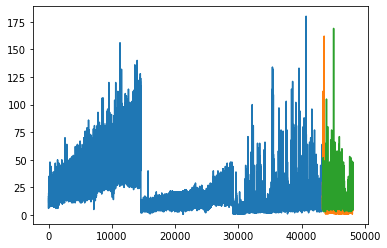

In [ ]:
# Graficar las predicciones y las observaciones
from matplotlib import pyplot

pyplot.plot(y_train)
pyplot.plot([None for i in y_train] + [x for x in y_val])# naranja valor actual
pyplot.plot([None for i in y_train] + [y for y in y_pred])# verde valor que se halló con la predicción
pyplot.show()